In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#  2457 and 7372

def turns_to_pwm(turns):
    return 2457 + (7372 - 2457) * 2.0 * turns

def pwm_to_turns(pwm):
    half_turns = (pwm - 2457)/(7372 - 2457)
    return 0.5 * half_turns

def deg_to_pwm(deg):
    return turns_to_pwm(deg/360.0)

def rad_to_pwm(rad):
    return turns_to_pwm(0.5 * rad / np.pi)

def pwm_to_rad(pwm):
    return 2.0 * np.pi * pwm_to_turns(pwm)

In [3]:
def parse_sol(sol_file):
    from os import path
    t = []
    a1 = []
    a2 = []
    f_in = None
    try:
        f_in = open(sol_file, "r")
    except:
        f_in = open(path.join("examples", sol_file), "r")
    for line in f_in:
        try:
            els = [float(x) for x in line.strip().split(",")]
            t.append(els[0])
            a1.append(pwm_to_rad(els[1]))
            a2.append(pwm_to_rad(els[2]))
        except:
            print("Trouble handling string \"" + line + "\"")
    f_in.close()
    t = [x - t[0] for x in t]
    return (t, a1, a2)

In [4]:
def plot_sol(sol_file):
    (t, a1, a2) = parse_sol(sol_file)
    plt.plot(t, a1, 'b-')
    plt.plot(t, a2, 'r-')

Trouble handling string "
"
Trouble handling string "
"


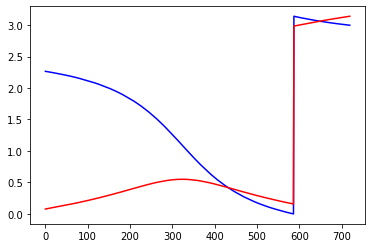

In [5]:
plot_sol('solution0.txt')

In [12]:
def sky_plane_plot(sol_file, color=None):
    (t1, a1, a2) = parse_sol(sol_file)
    n = len(a1)
    ys = [np.cos(a1[i])*np.cos(a2[i])/np.sin(a2[i]) for i in range(n)] # ys are north
    xs = [np.sin(a1[i])*np.cos(a2[i])/np.sin(a2[i]) for i in range(n)] # xs are east
    zs = [1.0 for i in range(n)]
    plt.plot(xs, ys, color or 'k.')

In [21]:
def sky_hemi_plot(sol_file, color=None, scale_az_by = 1.0):
    (t1, a1, a2) = parse_sol(sol_file)
    n = len(a1)
    ys = [np.cos(a1[i] * scale_az_by)*np.cos(a2[i]) for i in range(n)] # ys are north
    xs = [np.sin(a1[i] * scale_az_by)*np.cos(a2[i]) for i in range(n)] # xs are east
    zs = [1.0 for i in range(n)]
    plt.plot(xs, ys, color or 'k.')

Trouble handling string "
"
Trouble handling string "
"


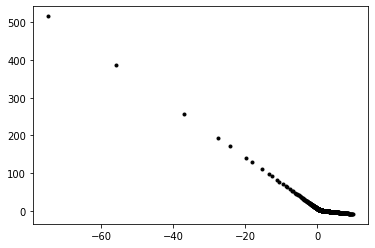

In [18]:
sky_plane_plot("solution0.txt")

Trouble handling string "
"
Trouble handling string "
"
Trouble handling string "
"
Trouble handling string "
"
Trouble handling string "
"
Trouble handling string "
"
Trouble handling string "
"
Trouble handling string "
"


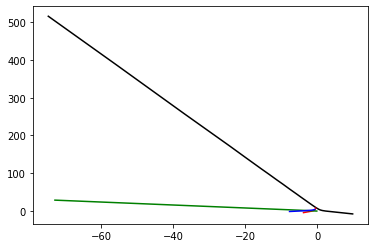

In [19]:
for i in range(4):
    sky_plane_plot("solution" + str(i) + ".txt", color = "krgb"[i] + '-')

Trouble handling string "
"
Trouble handling string "
"


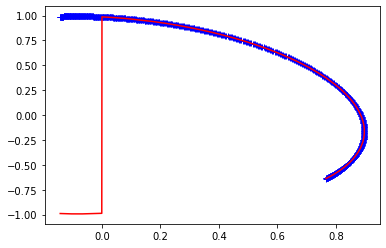

In [28]:
sky_hemi_plot("solution0.txt", 'b+')
sky_hemi_plot("check_against_sol0.txt", 'r-')